<a href="https://colab.research.google.com/github/Gulzar-khan/ML-PRACTICE/blob/main/Insurance_Decisioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> <u>Problem Statement</u></b>

### Picture this. You are a data scientist in a start-up culture with the potential to have a very large impact on the business. Oh, and you are backed up by a company with 140 years' business experience.

### Curious? Great! You are the kind of person we are looking for.

### Prudential, one of the largest issuers of life insurance in the USA, is hiring passionate data scientists to join a newly-formed Data Science group solving complex challenges and identifying opportunities. The results have been impressive so far but they want more. 

### In a one-click shopping world with on-demand everything, the life insurance application process is antiquated. Customers provide extensive information to identify risk classification and eligibility, including scheduling medical exams, a process that takes an average of 30 days.

### The result? People are turned off. That’s why only 40% of U.S. households own individual life insurance. Prudential wants to make it quicker and less labor intensive for new and existing customers to get a quote while maintaining privacy boundaries.

### By developing a predictive model that accurately classifies risk using a more automated approach, you can greatly impact public perception of the industry.

### The results will help Prudential better understand the predictive power of the data points in the existing assessment, enabling them to significantly streamline the process.

## <b>In this self project, you are required to do </b>

* ### Perform exploratory data analysis
* ### Build logistic regression, random forest, gradient boosted decision trees and xgboost models
* ### Evaluate the performance of the models using different set of metrics and prepare a final dataframe containing the train and test metrics for each of the models

## <b>Some of the guidelines for the project :</b>
* ### Describe in detail each of the experiments 
* ### Include plots and charts
* ### Draw the final conclusion on the basis of comparison of different models. 

# <b><u>Variable Description 

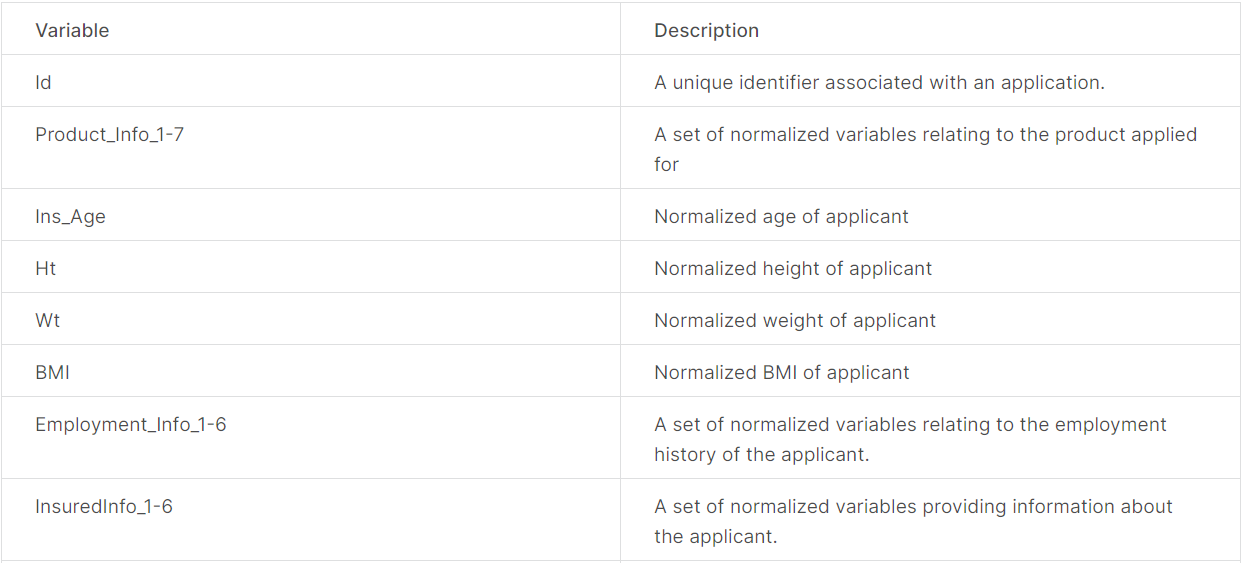

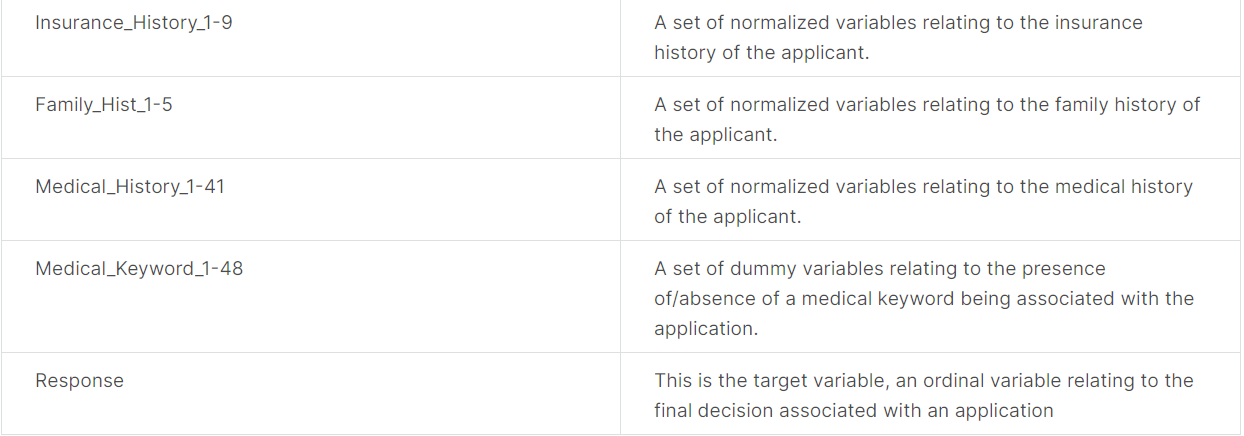

In [ ]:
!pip install scikit-optimize

     |████████████████████████████████| 100 kB 4.1 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn import ensemble

ModuleNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Almabetter/ML/week 10/4. Guided Project -  Insurance Decisioning/train.csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


In [ ]:
df.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [ ]:
df = df.drop('Id', axis=1) #Data point is unique, you generally drop them

In [ ]:
df.describe()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59362.000000,59381.000000,59381.000000,52602.000000,59381.000000,48527.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,33985.000000,59381.000000,59381.000000,59381.000000,59381.000000,30725.000000,25140.000000,40197.000000,17570.000000,50492.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462,0.077582,8.641821,1.300904,0.006283,2.142958,0.361469,1.209326,2.007427,5.835840,2.883666,1.027180,1.409188,1.038531,1.727606,1.055792,2.146983,1.958707,0.001733,1.901989,2.048484,2.419360,2.686230,0.474550,0.497737,0.444890,0.484635,7.962172,253.987100,2.102171,1.654873,...,0.036459,0.058015,0.010003,0.005962,0.007848,0.190465,0.012715,0.009161,0.007494,0.009296,0.008134,0.014601,0.037167,0.097775,0.018895,0.089456,0.013439,0.011856,0.014937,0.011755,0.025042,0.010896,0.021168,0.022836,0.020646,0.006938,0.010407,0.066587,0.006837,0.013658,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,0.122213,0.082347,4.227082,0.715034,0.032816,0.350033,0.349551,0.417939,0.085858,2.674536,0.320627,0.231566,0.491688,0.274915,0.445195,0.329328,0.989139,0.945739,0.007338,0.971223,0.755149,0.509577,0.483159,0.154959,0.140187,0.163012,0.129200,13.027697,178.621154,0.303098,0.475414,...,0.187432,0.233774,0.099515,0.076981,0.088239,0.392671,0.112040,0.095275,0.086244,0.095967,0.089821,0.119949,0.189172,0.297013,0.136155,0.285404,0.115145,0.108237,0.121304,0.107780,0.156253,0.103813,0.143947,0.149380,0.142198,0.083007,0.101485,0.249307,0.082405,0.116066,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00

**According to the datset, all product info except product info 2 and 4 are categorical. Product info 2 is a string variable, while 4 is a continuous variable.**

**All employment info except 1, 4 and 6 are categorical. Employment info 1, 4 and 6 are continuous variables.**

**All insurance history except insurance history 5 are categorical. Insurance history 5 is a continuous variable.**

**All family history are categorical except 2, 3, 4 and 5, which are continuous variables.**

**All the medical history info are categorical except 1, 10, 15, 24 and 32, which are discrete variables. While all medical keyword info are categorical dummy variables.**

**Insurance age, Height, weight and BMI are continuous variables as well**

# **EDA**

**Lets check for number of columns with majority of missing values**

In [ ]:
missing_cols = df.isnull().mean()

In [ ]:
missing_cols[missing_cols>0.4].sort_values(ascending=False)

Medical_History_10     0.990620
Medical_History_32     0.981358
Medical_History_24     0.935990
Medical_History_15     0.751015
Family_Hist_5          0.704114
Family_Hist_3          0.576632
Family_Hist_2          0.482579
Insurance_History_5    0.427679
dtype: float64

**We would like to delete those columns that have more than 40 % of missing values**

In [ ]:
df = df.dropna(thresh=0.4*df.shape[0], axis=1)

**Now we need to deal with missing values in columns with lss than 40% missing values.**

In [ ]:
df.isnull().mean()[df.isnull().mean() > 0]

Employment_Info_1      0.000320
Employment_Info_4      0.114161
Employment_Info_6      0.182786
Insurance_History_5    0.427679
Family_Hist_2          0.482579
Family_Hist_3          0.576632
Family_Hist_4          0.323066
Medical_History_1      0.149694
dtype: float64

**We can choose to drop Insurance history 5 and Family history 2 and 3**

In [ ]:
df = df.drop(['Insurance_History_5','Family_Hist_2','Family_Hist_3'], axis=1)

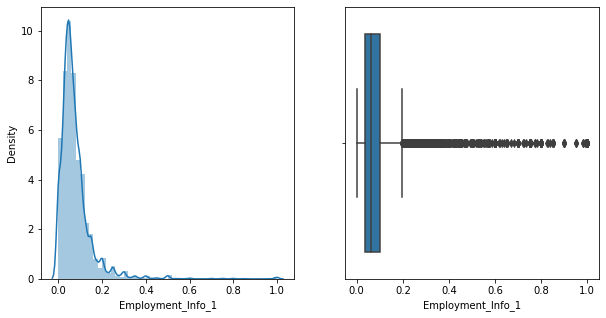

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(df['Employment_Info_1'], ax=axes[0])
sns.boxplot(df['Employment_Info_1'], ax=axes[1])

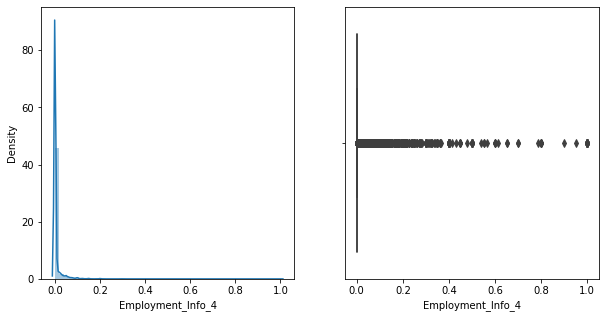

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(df['Employment_Info_4'], ax=axes[0])
sns.boxplot(df['Employment_Info_4'], ax=axes[1])

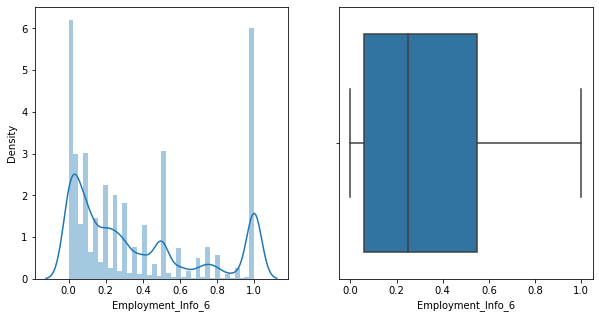

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(df['Employment_Info_6'], ax=axes[0])
sns.boxplot(df['Employment_Info_6'], ax=axes[1])

In [ ]:
df['Employment_Info_1'] = df['Employment_Info_1'].fillna(df['Employment_Info_1'].median())
df['Employment_Info_4'] = df['Employment_Info_4'].fillna(df['Employment_Info_4'].median())
df['Employment_Info_6'] = df['Employment_Info_6'].fillna(df['Employment_Info_6'].mean())

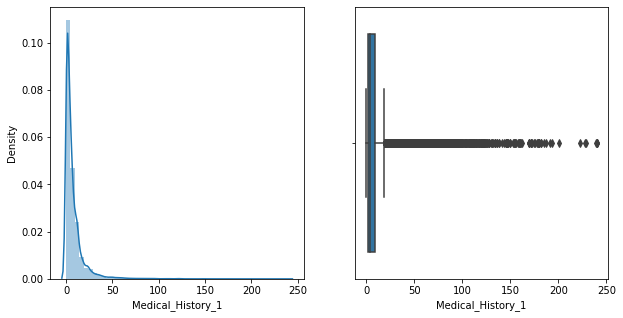

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(df['Medical_History_1'], ax=axes[0])
sns.boxplot(df['Medical_History_1'], ax=axes[1])

In [ ]:
df['Medical_History_1'] = df['Medical_History_1'].fillna(df['Medical_History_1'].median())

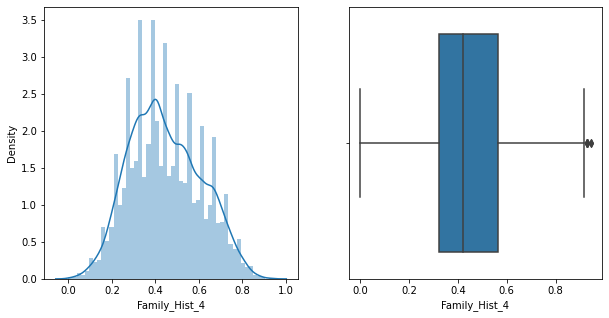

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(df['Family_Hist_4'], ax=axes[0])
sns.boxplot(df['Family_Hist_4'], ax=axes[1])

In [ ]:
df['Family_Hist_4'] = df['Family_Hist_4'].fillna(df['Family_Hist_4'].mean())

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df = df.drop('Product_Info_2', axis=1)

**Lets look at the numerical variables Age, Height, weight and BMI**

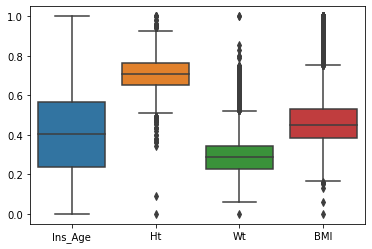

In [ ]:
sns.boxplot(data=df[['Ins_Age','Ht','Wt','BMI']])

**Lets look st the distribution of our target variables**

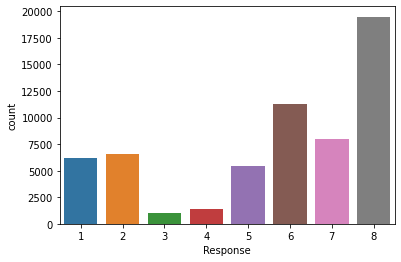

In [ ]:
sns.countplot(x='Response',data=df)

**Dividing it into two classes :**

In [ ]:
df['Response'] = df['Response'].apply(lambda x : 1 if x==8 else 0)

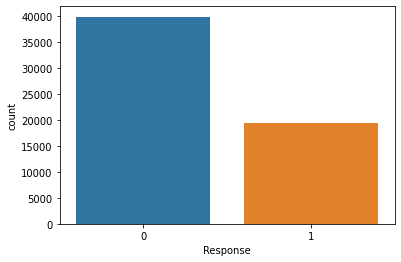

In [ ]:
sns.countplot(x='Response',data=df)

In [ ]:
df.head()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,...,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,0.361469,1,2,6,3,1,2,1,1,1,3,1,1,1,2,2,0.444890,4.0,112,2,1,1,3,2,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.001800,1,2,6,3,1,2,1,2,1,3,1,1,3,2,2,0.084507,5.0,412,2,1,1,3,2,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.030000,1,2,8,3,1,1,1,2,1,1,3,3,2,3,3,0.225352,10.0,3,2,2,1,3,2,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.200000,2,2,8,3,1,2,1,2,1,1,3,3,2,3,3,0.352113,0.0,350,2,2,1,3,2,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.050000,1,2,6,3,1,2,1,2,1,1,3,3,2,3,2,0.408451,4.0,162,2,2,1,3,2,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
X, y = df.drop('Response',axis=1), df['Response']

**Lets split the data into train and test data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

**Now Lets implement 3 models on our dataset:**

1. **Logistic Regression**
2. **Random Forrest**
3. **XGBoost**

**We will be using three search algorithms for each :**

1. **GridSearchCV**
2. **RandomSearchCV**
3. **BayesianSearchCV**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

### Logistic Regression 

In [ ]:
lr = LogisticRegression()
rf = RandomForestClassifier()
xgb = XGBClassifier(objective= 'binary:logistic', nthread=4, seed=42)

In [ ]:
param_dict_lr = {
    'C' : [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1e-3,1e+4,1e+5,1e+6]
}

param_dict_rf = {
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [40, 50],
    'min_samples_split': [50, 100, 150],
    'n_estimators': [50, 80, 100]
  }

param_dict_xgb = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.05, 0.01, 0.005]
  }

In [ ]:
lr_grid = GridSearchCV(estimator=lr,
                       param_grid = param_dict_lr,
                       cv = 5, verbose=2, scoring='roc_auc')

lr_grid.fit(X_train,y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV] C=1e-06 .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......................................... C=1e-06, total=   0.8s
[CV] C=1e-06 .........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] .......................................... C=1e-06, total=   0.9s
[CV] C=1e-06 .........................................................
[CV] .......................................... C=1e-06, total=   0.9s
[CV] C=1e-06 .........................................................
[CV] .......................................... C=1e-06, total=   0.8s
[CV] C=1e-06 .........................................................
[CV] .......................................... C=1e-06, total=   0.8s
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   1.6s
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   1.6s
[CV] C=1e-05 .........................................................
[CV] .......................................... C=1e-05, total=   1.6s
[CV] C=1e-05 .........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:  1.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                               100, 0.001, 10000.0, 100000.0, 1000000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=2)

In [ ]:
print('Train ROC-AUC score : ', lr_grid.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', lr_grid.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.7528236218704389
Test ROC-AUC score :  0.7515155597467331


In [ ]:
lr_random = RandomizedSearchCV(estimator=lr,
                       param_distributions = param_dict_lr,
                       cv = 5, verbose=2, scoring='roc_auc')

lr_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=100000.0 ......................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................................... C=100000.0, total=   1.5s
[CV] C=100000.0 ......................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] ....................................... C=100000.0, total=   1.7s
[CV] C=100000.0 ......................................................
[CV] ....................................... C=100000.0, total=   1.6s
[CV] C=100000.0 ......................................................
[CV] ....................................... C=100000.0, total=   1.6s
[CV] C=100000.0 ......................................................
[CV] ....................................... C=100000.0, total=   1.6s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   1.5s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   1.6s
[CV] C=0.001 .........................................................
[CV] .......................................... C=0.001, total=   1.6s
[CV] C=0.001 .........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                              0.1, 1, 10, 100, 0.001, 10000.0,
                                              100000.0, 1000000.0]},
                   pre_dispatch='2*n_jobs', random_s

In [ ]:
print('Train ROC-AUC score : ', lr_random.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', lr_random.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.7528236218704389
Test ROC-AUC score :  0.7515155597467331


In [ ]:
lr_bayes = BayesSearchCV(estimator=lr,
                       search_spaces = {'C' : Real(1e-6, 1e+6, prior='log-uniform') },
                       cv = 5, verbose=2, scoring='roc_auc', n_iter=32)

lr_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=0.5417580600584903 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. C=0.5417580600584903, total=   1.6s
[CV] C=0.5417580600584903 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] ............................. C=0.5417580600584903, total=   1.7s
[CV] C=0.5417580600584903 ............................................
[CV] ............................. C=0.5417580600584903, total=   1.6s
[CV] C=0.5417580600584903 ............................................
[CV] ............................. C=0.5417580600584903, total=   1.6s
[CV] C=0.5417580600584903 ............................................
[CV] ............................. C=0.5417580600584903, total=   1.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=909.1903676926113 .............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=909.1903676926113, total=   1.6s
[CV] C=909.1903676926113 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] .............................. C=909.1903676926113, total=   1.6s
[CV] C=909.1903676926113 .............................................
[CV] .............................. C=909.1903676926113, total=   1.6s
[CV] C=909.1903676926113 .............................................
[CV] .............................. C=909.1903676926113, total=   1.6s
[CV] C=909.1903676926113 .............................................
[CV] .............................. C=909.1903676926113, total=   1.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1.0162910516360069 ............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. C=1.0162910516360069, total=   1.7s
[CV] C=1.0162910516360069 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] ............................. C=1.0162910516360069, total=   1.6s
[CV] C=1.0162910516360069 ............................................
[CV] ............................. C=1.0162910516360069, total=   1.5s
[CV] C=1.0162910516360069 ............................................
[CV] ............................. C=1.0162910516360069, total=   1.6s
[CV] C=1.0162910516360069 ............................................
[CV] ............................. C=1.0162910516360069, total=   1.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=4.772399039348349e-06 .........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......................... C=4.772399039348349e-06, total=   1.6s
[CV] C=4.772399039348349e-06 .........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] .......................... C=4.772399039348349e-06, total=   1.6s
[CV] C=4.772399039348349e-06 .........................................
[CV] .......................... C=4.772399039348349e-06, total=   1.4s
[CV] C=4.772399039348349e-06 .........................................
[CV] .......................... C=4.772399039348349e-06, total=   1.4s
[CV] C=4.772399039348349e-06 .........................................
[CV] .......................... C=4.772399039348349e-06, total=   1.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=276005.6939297458 .............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=276005.6939297458, total=   1.6s
[CV] C=276005.6939297458 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] .............................. C=276005.6939297458, total=   1.6s
[CV] C=276005.6939297458 .............................................
[CV] .............................. C=276005.6939297458, total=   1.6s
[CV] C=276005.6939297458 .............................................
[CV] .............................. C=276005.6939297458, total=   1.6s
[CV] C=276005.6939297458 .............................................
[CV] .............................. C=276005.6939297458, total=   1.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=0.00011653173104322049 ........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......................... C=0.00011653173104322049, total=   1.5s
[CV] C=0.00011653173104322049 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] ......................... C=0.00011653173104322049, total=   1.6s
[CV] C=0.00011653173104322049 ........................................
[CV] ......................... C=0.00011653173104322049, total=   1.5s
[CV] C=0.00011653173104322049 ........................................
[CV] ......................... C=0.00011653173104322049, total=   1.6s
[CV] C=0.00011653173104322049 ........................................
[CV] ......................... C=0.00011653173104322049, total=   1.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=63815.23694748037 .............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=63815.23694748037, total=   1.6s
[CV] C=63815.23694748037 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] .............................. C=63815.23694748037, total=   1.6s
[CV] C=63815.23694748037 .............................................
[CV] .............................. C=63815.23694748037, total=   1.6s
[CV] C=63815.23694748037 .............................................
[CV] .............................. C=63815.23694748037, total=   1.6s
[CV] C=63815.23694748037 .............................................
[CV] .............................. C=63815.23694748037, total=   1.6s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=217.0997553575752 .............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=217.0997553575752, total=   1.6s
[CV] C=217.0997553575752 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] .............................. C=217.0997553575752, total=   1.6s
[CV] C=217.0997553575752 .............................................
[CV] .............................. C=217.0997553575752, total=   1.5s
[CV] C=217.0997553575752 .............................................
[CV] .............................. C=217.0997553575752, total=   1.6s
[CV] C=217.0997553575752 .............................................
[CV] .............................. C=217.0997553575752, total=   1.5s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=5.521848244248046e-05 .........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......................... C=5.521848244248046e-05, total=   1.6s
[CV] C=5.521848244248046e-05 .........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] .......................... C=5.521848244248046e-05, total=   1.6s
[CV] C=5.521848244248046e-05 .........................................
[CV] .......................... C=5.521848244248046e-05, total=   1.6s
[CV] C=5.521848244248046e-05 .........................................
[CV] .......................... C=5.521848244248046e-05, total=   1.6s
[CV] C=5.521848244248046e-05 .........................................
[CV] .......................... C=5.521848244248046e-05, total=   1.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.9s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=8.292280684362937e-06 .........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......................... C=8.292280684362937e-06, total=   1.6s
[CV] C=8.292280684362937e-06 .........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] .......................... C=8.292280684362937e-06, total=   1.5s
[CV] C=8.292280684362937e-06 .........................................
[CV] .......................... C=8.292280684362937e-06, total=   1.6s
[CV] C=8.292280684362937e-06 .........................................
[CV] .......................... C=8.292280684362937e-06, total=   1.6s
[CV] C=8.292280684362937e-06 .........................................
[CV] .......................... C=8.292280684362937e-06, total=   1.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.9s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=0.0047464793902318725 .........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......................... C=0.0047464793902318725, total=   1.6s
[CV] C=0.0047464793902318725 .........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] .......................... C=0.0047464793902318725, total=   1.6s
[CV] C=0.0047464793902318725 .........................................
[CV] .......................... C=0.0047464793902318725, total=   1.6s
[CV] C=0.0047464793902318725 .........................................
[CV] .......................... C=0.0047464793902318725, total=   1.6s
[CV] C=0.0047464793902318725 .........................................
[CV] .......................... C=0.0047464793902318725, total=   1.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.9s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1000000.0 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................................... C=1000000.0, total=   1.5s
[CV] C=1000000.0 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] ...................................... C=1000000.0, total=   1.6s
[CV] C=1000000.0 .....................................................
[CV] ...................................... C=1000000.0, total=   1.6s
[CV] C=1000000.0 .....................................................
[CV] ...................................... C=1000000.0, total=   1.6s
[CV] C=1000000.0 .....................................................
[CV] ...................................... C=1000000.0, total=   1.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=12.894629270477346 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. C=12.894629270477346, total=   1.6s
[CV] C=12.894629270477346 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] ............................. C=12.894629270477346, total=   1.6s
[CV] C=12.894629270477346 ............................................
[CV] ............................. C=12.894629270477346, total=   1.5s
[CV] C=12.894629270477346 ............................................
[CV] ............................. C=12.894629270477346, total=   1.6s
[CV] C=12.894629270477346 ............................................
[CV] ............................. C=12.894629270477346, total=   1.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.9s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=0.028380736059090656 ..........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................... C=0.028380736059090656, total=   1.6s
[CV] C=0.028380736059090656 ..........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] ........................... C=0.028380736059090656, total=   1.6s
[CV] C=0.028380736059090656 ..........................................
[CV] ........................... C=0.028380736059090656, total=   1.6s
[CV] C=0.028380736059090656 ..........................................
[CV] ........................... C=0.028380736059090656, total=   1.6s
[CV] C=0.028380736059090656 ..........................................
[CV] ........................... C=0.028380736059090656, total=   1.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=6410.679743490511 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=6410.679743490511, total=   1.6s
[CV] C=6410.679743490511 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] .............................. C=6410.679743490511, total=   1.6s
[CV] C=6410.679743490511 .............................................
[CV] .............................. C=6410.679743490511, total=   1.6s
[CV] C=6410.679743490511 .............................................
[CV] .............................. C=6410.679743490511, total=   1.7s
[CV] C=6410.679743490511 .............................................
[CV] .............................. C=6410.679743490511, total=   1.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=0.002720917850647792 ..........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................... C=0.002720917850647792, total=   1.6s
[CV] C=0.002720917850647792 ..........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] ........................... C=0.002720917850647792, total=   1.6s
[CV] C=0.002720917850647792 ..........................................
[CV] ........................... C=0.002720917850647792, total=   1.5s
[CV] C=0.002720917850647792 ..........................................
[CV] ........................... C=0.002720917850647792, total=   1.6s
[CV] C=0.002720917850647792 ..........................................
[CV] ........................... C=0.002720917850647792, total=   1.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.9s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=0.027972583322024906 ..........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................... C=0.027972583322024906, total=   1.7s
[CV] C=0.027972583322024906 ..........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] ........................... C=0.027972583322024906, total=   1.6s
[CV] C=0.027972583322024906 ..........................................
[CV] ........................... C=0.027972583322024906, total=   1.6s
[CV] C=0.027972583322024906 ..........................................
[CV] ........................... C=0.027972583322024906, total=   1.6s
[CV] C=0.027972583322024906 ..........................................
[CV] ........................... C=0.027972583322024906, total=   1.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=995908.8721597381 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=995908.8721597381, total=   1.6s
[CV] C=995908.8721597381 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] .............................. C=995908.8721597381, total=   1.7s
[CV] C=995908.8721597381 .............................................
[CV] .............................. C=995908.8721597381, total=   1.6s
[CV] C=995908.8721597381 .............................................
[CV] .............................. C=995908.8721597381, total=   1.6s
[CV] C=995908.8721597381 .............................................
[CV] .............................. C=995908.8721597381, total=   1.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=52.686034869919176 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. C=52.686034869919176, total=   1.6s
[CV] C=52.686034869919176 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] ............................. C=52.686034869919176, total=   1.7s
[CV] C=52.686034869919176 ............................................
[CV] ............................. C=52.686034869919176, total=   1.6s
[CV] C=52.686034869919176 ............................................
[CV] ............................. C=52.686034869919176, total=   1.7s
[CV] C=52.686034869919176 ............................................
[CV] ............................. C=52.686034869919176, total=   1.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=0.018846913444771143 ..........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................... C=0.018846913444771143, total=   1.6s
[CV] C=0.018846913444771143 ..........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] ........................... C=0.018846913444771143, total=   1.7s
[CV] C=0.018846913444771143 ..........................................
[CV] ........................... C=0.018846913444771143, total=   1.6s
[CV] C=0.018846913444771143 ..........................................
[CV] ........................... C=0.018846913444771143, total=   1.6s
[CV] C=0.018846913444771143 ..........................................
[CV] ........................... C=0.018846913444771143, total=   1.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=0.10571789813246696 ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ C=0.10571789813246696, total=   1.7s
[CV] C=0.10571789813246696 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] ............................ C=0.10571789813246696, total=   1.6s
[CV] C=0.10571789813246696 ...........................................
[CV] ............................ C=0.10571789813246696, total=   1.6s
[CV] C=0.10571789813246696 ...........................................
[CV] ............................ C=0.10571789813246696, total=   1.6s
[CV] C=0.10571789813246696 ...........................................
[CV] ............................ C=0.10571789813246696, total=   1.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=6.709337814914203 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=6.709337814914203, total=   1.6s
[CV] C=6.709337814914203 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] .............................. C=6.709337814914203, total=   1.6s
[CV] C=6.709337814914203 .............................................
[CV] .............................. C=6.709337814914203, total=   1.6s
[CV] C=6.709337814914203 .............................................
[CV] .............................. C=6.709337814914203, total=   1.7s
[CV] C=6.709337814914203 .............................................
[CV] .............................. C=6.709337814914203, total=   1.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=81.05912857846543 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=81.05912857846543, total=   1.6s
[CV] C=81.05912857846543 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] .............................. C=81.05912857846543, total=   1.6s
[CV] C=81.05912857846543 .............................................
[CV] .............................. C=81.05912857846543, total=   1.5s
[CV] C=81.05912857846543 .............................................
[CV] .............................. C=81.05912857846543, total=   1.7s
[CV] C=81.05912857846543 .............................................
[CV] .............................. C=81.05912857846543, total=   1.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=19166.622501213733 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. C=19166.622501213733, total=   1.6s
[CV] C=19166.622501213733 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] ............................. C=19166.622501213733, total=   1.7s
[CV] C=19166.622501213733 ............................................
[CV] ............................. C=19166.622501213733, total=   1.6s
[CV] C=19166.622501213733 ............................................
[CV] ............................. C=19166.622501213733, total=   1.7s
[CV] C=19166.622501213733 ............................................
[CV] ............................. C=19166.622501213733, total=   1.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.2s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=0.012914038995564951 ..........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................... C=0.012914038995564951, total=   1.6s
[CV] C=0.012914038995564951 ..........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] ........................... C=0.012914038995564951, total=   1.7s
[CV] C=0.012914038995564951 ..........................................
[CV] ........................... C=0.012914038995564951, total=   1.6s
[CV] C=0.012914038995564951 ..........................................
[CV] ........................... C=0.012914038995564951, total=   1.6s
[CV] C=0.012914038995564951 ..........................................
[CV] ........................... C=0.012914038995564951, total=   1.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=0.012783428780049386 ..........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................... C=0.012783428780049386, total=   1.7s
[CV] C=0.012783428780049386 ..........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] ........................... C=0.012783428780049386, total=   1.7s
[CV] C=0.012783428780049386 ..........................................
[CV] ........................... C=0.012783428780049386, total=   1.6s
[CV] C=0.012783428780049386 ..........................................
[CV] ........................... C=0.012783428780049386, total=   1.6s
[CV] C=0.012783428780049386 ..........................................
[CV] ........................... C=0.012783428780049386, total=   1.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.2s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=996590.3910135144 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=996590.3910135144, total=   1.6s
[CV] C=996590.3910135144 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] .............................. C=996590.3910135144, total=   1.7s
[CV] C=996590.3910135144 .............................................
[CV] .............................. C=996590.3910135144, total=   1.6s
[CV] C=996590.3910135144 .............................................
[CV] .............................. C=996590.3910135144, total=   1.7s
[CV] C=996590.3910135144 .............................................
[CV] .............................. C=996590.3910135144, total=   1.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.2s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=169289.7780791131 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=169289.7780791131, total=   1.6s
[CV] C=169289.7780791131 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] .............................. C=169289.7780791131, total=   1.6s
[CV] C=169289.7780791131 .............................................
[CV] .............................. C=169289.7780791131, total=   1.6s
[CV] C=169289.7780791131 .............................................
[CV] .............................. C=169289.7780791131, total=   1.7s
[CV] C=169289.7780791131 .............................................
[CV] .............................. C=169289.7780791131, total=   1.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=0.020827916993287378 ..........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................... C=0.020827916993287378, total=   1.6s
[CV] C=0.020827916993287378 ..........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] ........................... C=0.020827916993287378, total=   1.6s
[CV] C=0.020827916993287378 ..........................................
[CV] ........................... C=0.020827916993287378, total=   1.7s
[CV] C=0.020827916993287378 ..........................................
[CV] ........................... C=0.020827916993287378, total=   1.6s
[CV] C=0.020827916993287378 ..........................................
[CV] ........................... C=0.020827916993287378, total=   1.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=1713.2529080605934 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................. C=1713.2529080605934, total=   1.6s
[CV] C=1713.2529080605934 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] ............................. C=1713.2529080605934, total=   1.6s
[CV] C=1713.2529080605934 ............................................
[CV] ............................. C=1713.2529080605934, total=   1.6s
[CV] C=1713.2529080605934 ............................................
[CV] ............................. C=1713.2529080605934, total=   1.6s
[CV] C=1713.2529080605934 ............................................
[CV] ............................. C=1713.2529080605934, total=   1.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=4.531558784313782 .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=4.531558784313782, total=   1.6s
[CV] C=4.531558784313782 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV] .............................. C=4.531558784313782, total=   1.6s
[CV] C=4.531558784313782 .............................................
[CV] .............................. C=4.531558784313782, total=   1.6s
[CV] C=4.531558784313782 .............................................
[CV] .............................. C=4.531558784313782, total=   1.6s
[CV] C=4.531558784313782 .............................................
[CV] .............................. C=4.531558784313782, total=   1.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] C=0.0019984268827184038 .........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......................... C=0.0019984268827184038, total=   1.7s
[CV] C=0.0019984268827184038 .........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] .......................... C=0.0019984268827184038, total=   1.6s
[CV] C=0.0019984268827184038 .........................................
[CV] .......................... C=0.0019984268827184038, total=   1.6s
[CV] C=0.0019984268827184038 .........................................
[CV] .......................... C=0.0019984268827184038, total=   1.6s
[CV] C=0.0019984268827184038 .........................................
[CV] .......................... C=0.0019984268827184038, total=   1.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.1s finished


BayesSearchCV(cv=5, error_score='raise',
              estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                           fit_intercept=True,
                                           intercept_scaling=1, l1_ratio=None,
                                           max_iter=100, multi_class='auto',
                                           n_jobs=None, penalty='l2',
                                           random_state=None, solver='lbfgs',
                                           tol=0.0001, verbose=0,
                                           warm_start=False),
              fit_params=None, iid=True, n_iter=32, n_jobs=1, n_points=1,
              optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=None,
              refit=True, return_train_score=False, scoring='roc_auc',
              search_spaces={'C': Real(low=1e-06, high=1000000.0, prior='log-uniform', transform='identity')},
              verbose=2)

In [ ]:
lr_bayes.best_estimator_

LogisticRegression(C=0.012914038995564951, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print('Train ROC-AUC score : ', lr_bayes.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', lr_bayes.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.7471651510048276
Test ROC-AUC score :  0.7490906641519601


**Fom above three searches, we conclude that C = 1 is the best option.**

In [ ]:
lr_model = lr_grid.best_estimator_

### Random Forest Classifier

In [ ]:
rf_grid = GridSearchCV(estimator=rf,
                       param_grid = param_dict_rf,
                       cv = 5, verbose=2, scoring='roc_auc')

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50, total=   1.0s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   1.5s
[CV] max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80 
[CV]  max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80, total=   1.5s
[CV] max_depth=4, min_samples_leaf=40, min_samples_s

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  9.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [ ]:
print('Train ROC-AUC score : ', rf_grid.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', rf_grid.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8119456607162906
Test ROC-AUC score :  0.8062777852620234


In [ ]:
rf_random = RandomizedSearchCV(estimator=rf,
                       param_distributions = param_dict_rf,
                       cv = 5, verbose=2, scoring='roc_auc')

rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=40, max_depth=6 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=40, max_depth=6, total=   2.6s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=40, max_depth=6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=40, max_depth=6, total=   2.6s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=40, max_depth=6 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=40, max_depth=6, total=   2.6s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=40, max_depth=6 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=40, max_depth=6, total=   2.5s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=40, max_depth=6 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=40, max_depth=6, total=   2.6s
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8 
[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8, total=   2.6s
[CV] n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8 
[CV]  n_estimators=80, min_samples_split=100, min_samples_leaf=40, max_depth=8, total=   2.6s
[CV] n_estimators=80, min_samples_split=1

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_random.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 100,
 'n_estimators': 80}

In [ ]:
print('Train ROC-AUC score : ', rf_random.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', rf_random.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8088918827888177
Test ROC-AUC score :  0.8023036508150344


In [ ]:
rf_bayes = BayesSearchCV(estimator=rf,
                       search_spaces = {
                          'max_depth': Integer(4,8),
                          'min_samples_leaf': Integer(10,100),
                          'min_samples_split': Integer(50,150),
                          'n_estimators': Integer(10,100)
                        },
                       cv = 5, verbose=2, scoring='roc_auc')

rf_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=84, n_estimators=58 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=84, n_estimators=58, total=   1.2s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=84, n_estimators=58 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=84, n_estimators=58, total=   1.1s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=84, n_estimators=58 
[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=84, n_estimators=58, total=   1.1s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=84, n_estimators=58 
[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=84, n_estimators=58, total=   1.1s
[CV] max_depth=4, min_samples_leaf=50, min_samples_split=84, n_estimators=58 
[CV]  max_depth=4, min_samples_leaf=50, min_samples_split=84, n_estimators=58, total=   1.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=78, n_estimators=80 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=78, n_estimators=80, total=   2.1s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=78, n_estimators=80 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=78, n_estimators=80, total=   2.1s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=78, n_estimators=80 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=78, n_estimators=80, total=   2.1s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=78, n_estimators=80 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=78, n_estimators=80, total=   2.1s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=78, n_estimators=80 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=78, n_estimators=80, total=   2.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=4, min_samples_leaf=19, min_samples_split=131, n_estimators=44 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=19, min_samples_split=131, n_estimators=44, total=   0.9s
[CV] max_depth=4, min_samples_leaf=19, min_samples_split=131, n_estimators=44 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=19, min_samples_split=131, n_estimators=44, total=   0.9s
[CV] max_depth=4, min_samples_leaf=19, min_samples_split=131, n_estimators=44 
[CV]  max_depth=4, min_samples_leaf=19, min_samples_split=131, n_estimators=44, total=   0.9s
[CV] max_depth=4, min_samples_leaf=19, min_samples_split=131, n_estimators=44 
[CV]  max_depth=4, min_samples_leaf=19, min_samples_split=131, n_estimators=44, total=   0.9s
[CV] max_depth=4, min_samples_leaf=19, min_samples_split=131, n_estimators=44 
[CV]  max_depth=4, min_samples_leaf=19, min_samples_split=131, n_estimators=44, total=   0.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, min_samples_leaf=65, min_samples_split=138, n_estimators=77 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=7, min_samples_leaf=65, min_samples_split=138, n_estimators=77, total=   2.3s
[CV] max_depth=7, min_samples_leaf=65, min_samples_split=138, n_estimators=77 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  max_depth=7, min_samples_leaf=65, min_samples_split=138, n_estimators=77, total=   2.2s
[CV] max_depth=7, min_samples_leaf=65, min_samples_split=138, n_estimators=77 
[CV]  max_depth=7, min_samples_leaf=65, min_samples_split=138, n_estimators=77, total=   2.2s
[CV] max_depth=7, min_samples_leaf=65, min_samples_split=138, n_estimators=77 
[CV]  max_depth=7, min_samples_leaf=65, min_samples_split=138, n_estimators=77, total=   2.3s
[CV] max_depth=7, min_samples_leaf=65, min_samples_split=138, n_estimators=77 
[CV]  max_depth=7, min_samples_leaf=65, min_samples_split=138, n_estimators=77, total=   2.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=6, min_samples_leaf=78, min_samples_split=96, n_estimators=26 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=6, min_samples_leaf=78, min_samples_split=96, n_estimators=26, total=   0.7s
[CV] max_depth=6, min_samples_leaf=78, min_samples_split=96, n_estimators=26 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  max_depth=6, min_samples_leaf=78, min_samples_split=96, n_estimators=26, total=   0.7s
[CV] max_depth=6, min_samples_leaf=78, min_samples_split=96, n_estimators=26 
[CV]  max_depth=6, min_samples_leaf=78, min_samples_split=96, n_estimators=26, total=   0.7s
[CV] max_depth=6, min_samples_leaf=78, min_samples_split=96, n_estimators=26 
[CV]  max_depth=6, min_samples_leaf=78, min_samples_split=96, n_estimators=26, total=   0.7s
[CV] max_depth=6, min_samples_leaf=78, min_samples_split=96, n_estimators=26 
[CV]  max_depth=6, min_samples_leaf=78, min_samples_split=96, n_estimators=26, total=   0.7s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, min_samples_leaf=50, min_samples_split=138, n_estimators=70 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=7, min_samples_leaf=50, min_samples_split=138, n_estimators=70, total=   2.1s
[CV] max_depth=7, min_samples_leaf=50, min_samples_split=138, n_estimators=70 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV]  max_depth=7, min_samples_leaf=50, min_samples_split=138, n_estimators=70, total=   2.0s
[CV] max_depth=7, min_samples_leaf=50, min_samples_split=138, n_estimators=70 
[CV]  max_depth=7, min_samples_leaf=50, min_samples_split=138, n_estimators=70, total=   2.0s
[CV] max_depth=7, min_samples_leaf=50, min_samples_split=138, n_estimators=70 
[CV]  max_depth=7, min_samples_leaf=50, min_samples_split=138, n_estimators=70, total=   2.1s
[CV] max_depth=7, min_samples_leaf=50, min_samples_split=138, n_estimators=70 
[CV]  max_depth=7, min_samples_leaf=50, min_samples_split=138, n_estimators=70, total=   2.1s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=29, min_samples_split=101, n_estimators=58 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=29, min_samples_split=101, n_estimators=58, total=   1.9s
[CV] max_depth=8, min_samples_leaf=29, min_samples_split=101, n_estimators=58 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=29, min_samples_split=101, n_estimators=58, total=   1.9s
[CV] max_depth=8, min_samples_leaf=29, min_samples_split=101, n_estimators=58 
[CV]  max_depth=8, min_samples_leaf=29, min_samples_split=101, n_estimators=58, total=   1.9s
[CV] max_depth=8, min_samples_leaf=29, min_samples_split=101, n_estimators=58 
[CV]  max_depth=8, min_samples_leaf=29, min_samples_split=101, n_estimators=58, total=   1.9s
[CV] max_depth=8, min_samples_leaf=29, min_samples_split=101, n_estimators=58 
[CV]  max_depth=8, min_samples_leaf=29, min_samples_split=101, n_estimators=58, total=   1.9s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=5, min_samples_leaf=14, min_samples_split=129, n_estimators=81 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, min_samples_leaf=14, min_samples_split=129, n_estimators=81, total=   1.8s
[CV] max_depth=5, min_samples_leaf=14, min_samples_split=129, n_estimators=81 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  max_depth=5, min_samples_leaf=14, min_samples_split=129, n_estimators=81, total=   1.8s
[CV] max_depth=5, min_samples_leaf=14, min_samples_split=129, n_estimators=81 
[CV]  max_depth=5, min_samples_leaf=14, min_samples_split=129, n_estimators=81, total=   1.8s
[CV] max_depth=5, min_samples_leaf=14, min_samples_split=129, n_estimators=81 
[CV]  max_depth=5, min_samples_leaf=14, min_samples_split=129, n_estimators=81, total=   1.8s
[CV] max_depth=5, min_samples_leaf=14, min_samples_split=129, n_estimators=81 
[CV]  max_depth=5, min_samples_leaf=14, min_samples_split=129, n_estimators=81, total=   1.8s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=4, min_samples_leaf=79, min_samples_split=80, n_estimators=54 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=79, min_samples_split=80, n_estimators=54, total=   1.0s
[CV] max_depth=4, min_samples_leaf=79, min_samples_split=80, n_estimators=54 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=79, min_samples_split=80, n_estimators=54, total=   1.1s
[CV] max_depth=4, min_samples_leaf=79, min_samples_split=80, n_estimators=54 
[CV]  max_depth=4, min_samples_leaf=79, min_samples_split=80, n_estimators=54, total=   1.1s
[CV] max_depth=4, min_samples_leaf=79, min_samples_split=80, n_estimators=54 
[CV]  max_depth=4, min_samples_leaf=79, min_samples_split=80, n_estimators=54, total=   1.1s
[CV] max_depth=4, min_samples_leaf=79, min_samples_split=80, n_estimators=54 
[CV]  max_depth=4, min_samples_leaf=79, min_samples_split=80, n_estimators=54, total=   1.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=7, min_samples_leaf=45, min_samples_split=129, n_estimators=46 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=7, min_samples_leaf=45, min_samples_split=129, n_estimators=46, total=   1.4s
[CV] max_depth=7, min_samples_leaf=45, min_samples_split=129, n_estimators=46 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  max_depth=7, min_samples_leaf=45, min_samples_split=129, n_estimators=46, total=   1.4s
[CV] max_depth=7, min_samples_leaf=45, min_samples_split=129, n_estimators=46 
[CV]  max_depth=7, min_samples_leaf=45, min_samples_split=129, n_estimators=46, total=   1.4s
[CV] max_depth=7, min_samples_leaf=45, min_samples_split=129, n_estimators=46 
[CV]  max_depth=7, min_samples_leaf=45, min_samples_split=129, n_estimators=46, total=   1.4s
[CV] max_depth=7, min_samples_leaf=45, min_samples_split=129, n_estimators=46 
[CV]  max_depth=7, min_samples_leaf=45, min_samples_split=129, n_estimators=46, total=   1.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.9s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=51, n_estimators=91 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=51, n_estimators=91, total=   2.9s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=51, n_estimators=91 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=51, n_estimators=91, total=   2.9s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=51, n_estimators=91 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=51, n_estimators=91, total=   2.8s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=51, n_estimators=91 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=51, n_estimators=91, total=   2.8s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=51, n_estimators=91 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=51, n_estimators=91, total=   2.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   14.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=13, min_samples_split=143, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=13, min_samples_split=143, n_estimators=10, total=   0.4s
[CV] max_depth=8, min_samples_leaf=13, min_samples_split=143, n_estimators=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=13, min_samples_split=143, n_estimators=10, total=   0.4s
[CV] max_depth=8, min_samples_leaf=13, min_samples_split=143, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=13, min_samples_split=143, n_estimators=10, total=   0.3s
[CV] max_depth=8, min_samples_leaf=13, min_samples_split=143, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=13, min_samples_split=143, n_estimators=10, total=   0.4s
[CV] max_depth=8, min_samples_leaf=13, min_samples_split=143, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=13, min_samples_split=143, n_estimators=10, total=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.9s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   3.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   3.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   3.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   3.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   3.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.8s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=147, n_estimators=99 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=147, n_estimators=99, total=   3.2s
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=147, n_estimators=99 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=147, n_estimators=99, total=   3.1s
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=147, n_estimators=99 
[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=147, n_estimators=99, total=   3.1s
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=147, n_estimators=99 
[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=147, n_estimators=99, total=   3.1s
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=147, n_estimators=99 
[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=147, n_estimators=99, total=   3.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   3.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   3.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   3.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   3.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   3.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=90, min_samples_split=52, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=90, min_samples_split=52, n_estimators=10, total=   0.4s
[CV] max_depth=8, min_samples_leaf=90, min_samples_split=52, n_estimators=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=90, min_samples_split=52, n_estimators=10, total=   0.4s
[CV] max_depth=8, min_samples_leaf=90, min_samples_split=52, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=90, min_samples_split=52, n_estimators=10, total=   0.4s
[CV] max_depth=8, min_samples_leaf=90, min_samples_split=52, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=90, min_samples_split=52, n_estimators=10, total=   0.4s
[CV] max_depth=8, min_samples_leaf=90, min_samples_split=52, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=90, min_samples_split=52, n_estimators=10, total=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.9s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=12, min_samples_split=147, n_estimators=98 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=12, min_samples_split=147, n_estimators=98, total=   3.2s
[CV] max_depth=8, min_samples_leaf=12, min_samples_split=147, n_estimators=98 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=12, min_samples_split=147, n_estimators=98, total=   3.2s
[CV] max_depth=8, min_samples_leaf=12, min_samples_split=147, n_estimators=98 
[CV]  max_depth=8, min_samples_leaf=12, min_samples_split=147, n_estimators=98, total=   3.2s
[CV] max_depth=8, min_samples_leaf=12, min_samples_split=147, n_estimators=98 
[CV]  max_depth=8, min_samples_leaf=12, min_samples_split=147, n_estimators=98, total=   3.2s
[CV] max_depth=8, min_samples_leaf=12, min_samples_split=147, n_estimators=98 
[CV]  max_depth=8, min_samples_leaf=12, min_samples_split=147, n_estimators=98, total=   3.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=93, min_samples_split=149, n_estimators=99 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=93, min_samples_split=149, n_estimators=99, total=   3.2s
[CV] max_depth=8, min_samples_leaf=93, min_samples_split=149, n_estimators=99 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=93, min_samples_split=149, n_estimators=99, total=   3.1s
[CV] max_depth=8, min_samples_leaf=93, min_samples_split=149, n_estimators=99 
[CV]  max_depth=8, min_samples_leaf=93, min_samples_split=149, n_estimators=99, total=   3.1s
[CV] max_depth=8, min_samples_leaf=93, min_samples_split=149, n_estimators=99 
[CV]  max_depth=8, min_samples_leaf=93, min_samples_split=149, n_estimators=99, total=   3.1s
[CV] max_depth=8, min_samples_leaf=93, min_samples_split=149, n_estimators=99 
[CV]  max_depth=8, min_samples_leaf=93, min_samples_split=149, n_estimators=99, total=   3.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.8s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   3.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   3.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   3.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   3.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   3.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.6s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=28, min_samples_split=63, n_estimators=11 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=28, min_samples_split=63, n_estimators=11, total=   0.4s
[CV] max_depth=8, min_samples_leaf=28, min_samples_split=63, n_estimators=11 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=28, min_samples_split=63, n_estimators=11, total=   0.4s
[CV] max_depth=8, min_samples_leaf=28, min_samples_split=63, n_estimators=11 
[CV]  max_depth=8, min_samples_leaf=28, min_samples_split=63, n_estimators=11, total=   0.4s
[CV] max_depth=8, min_samples_leaf=28, min_samples_split=63, n_estimators=11 
[CV]  max_depth=8, min_samples_leaf=28, min_samples_split=63, n_estimators=11, total=   0.4s
[CV] max_depth=8, min_samples_leaf=28, min_samples_split=63, n_estimators=11 
[CV]  max_depth=8, min_samples_leaf=28, min_samples_split=63, n_estimators=11, total=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   3.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   3.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   3.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   3.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   3.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=87, min_samples_split=145, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=87, min_samples_split=145, n_estimators=100, total=   3.2s
[CV] max_depth=8, min_samples_leaf=87, min_samples_split=145, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=87, min_samples_split=145, n_estimators=100, total=   3.2s
[CV] max_depth=8, min_samples_leaf=87, min_samples_split=145, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=87, min_samples_split=145, n_estimators=100, total=   3.2s
[CV] max_depth=8, min_samples_leaf=87, min_samples_split=145, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=87, min_samples_split=145, n_estimators=100, total=   3.1s
[CV] max_depth=8, min_samples_leaf=87, min_samples_split=145, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=87, min_samples_split=145, n_estimators=100, total=   3.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.8s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   3.4s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   3.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   3.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   3.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   3.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.6s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=95, min_samples_split=61, n_estimators=99 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=95, min_samples_split=61, n_estimators=99, total=   3.1s
[CV] max_depth=8, min_samples_leaf=95, min_samples_split=61, n_estimators=99 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=95, min_samples_split=61, n_estimators=99, total=   3.1s
[CV] max_depth=8, min_samples_leaf=95, min_samples_split=61, n_estimators=99 
[CV]  max_depth=8, min_samples_leaf=95, min_samples_split=61, n_estimators=99, total=   3.1s
[CV] max_depth=8, min_samples_leaf=95, min_samples_split=61, n_estimators=99 
[CV]  max_depth=8, min_samples_leaf=95, min_samples_split=61, n_estimators=99, total=   3.1s
[CV] max_depth=8, min_samples_leaf=95, min_samples_split=61, n_estimators=99 
[CV]  max_depth=8, min_samples_leaf=95, min_samples_split=61, n_estimators=99, total=   3.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.6s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=12, min_samples_split=132, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=12, min_samples_split=132, n_estimators=10, total=   0.4s
[CV] max_depth=8, min_samples_leaf=12, min_samples_split=132, n_estimators=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=12, min_samples_split=132, n_estimators=10, total=   0.4s
[CV] max_depth=8, min_samples_leaf=12, min_samples_split=132, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=12, min_samples_split=132, n_estimators=10, total=   0.4s
[CV] max_depth=8, min_samples_leaf=12, min_samples_split=132, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=12, min_samples_split=132, n_estimators=10, total=   0.4s
[CV] max_depth=8, min_samples_leaf=12, min_samples_split=132, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=12, min_samples_split=132, n_estimators=10, total=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.9s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=97, min_samples_split=145, n_estimators=99 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=97, min_samples_split=145, n_estimators=99, total=   3.2s
[CV] max_depth=8, min_samples_leaf=97, min_samples_split=145, n_estimators=99 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=97, min_samples_split=145, n_estimators=99, total=   3.1s
[CV] max_depth=8, min_samples_leaf=97, min_samples_split=145, n_estimators=99 
[CV]  max_depth=8, min_samples_leaf=97, min_samples_split=145, n_estimators=99, total=   3.2s
[CV] max_depth=8, min_samples_leaf=97, min_samples_split=145, n_estimators=99 
[CV]  max_depth=8, min_samples_leaf=97, min_samples_split=145, n_estimators=99, total=   3.1s
[CV] max_depth=8, min_samples_leaf=97, min_samples_split=145, n_estimators=99 
[CV]  max_depth=8, min_samples_leaf=97, min_samples_split=145, n_estimators=99, total=   3.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   3.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   3.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   3.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   3.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   3.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   3.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   3.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   3.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   3.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=50, n_estimators=100, total=   3.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.5s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=97, min_samples_split=52, n_estimators=99 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=97, min_samples_split=52, n_estimators=99, total=   3.2s
[CV] max_depth=8, min_samples_leaf=97, min_samples_split=52, n_estimators=99 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=97, min_samples_split=52, n_estimators=99, total=   3.1s
[CV] max_depth=8, min_samples_leaf=97, min_samples_split=52, n_estimators=99 
[CV]  max_depth=8, min_samples_leaf=97, min_samples_split=52, n_estimators=99, total=   3.1s
[CV] max_depth=8, min_samples_leaf=97, min_samples_split=52, n_estimators=99 
[CV]  max_depth=8, min_samples_leaf=97, min_samples_split=52, n_estimators=99, total=   3.0s
[CV] max_depth=8, min_samples_leaf=97, min_samples_split=52, n_estimators=99 
[CV]  max_depth=8, min_samples_leaf=97, min_samples_split=52, n_estimators=99, total=   3.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.6s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=16, min_samples_split=56, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=16, min_samples_split=56, n_estimators=10, total=   0.4s
[CV] max_depth=8, min_samples_leaf=16, min_samples_split=56, n_estimators=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=16, min_samples_split=56, n_estimators=10, total=   0.4s
[CV] max_depth=8, min_samples_leaf=16, min_samples_split=56, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=16, min_samples_split=56, n_estimators=10, total=   0.4s
[CV] max_depth=8, min_samples_leaf=16, min_samples_split=56, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=16, min_samples_split=56, n_estimators=10, total=   0.4s
[CV] max_depth=8, min_samples_leaf=16, min_samples_split=56, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=16, min_samples_split=56, n_estimators=10, total=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.9s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=142, n_estimators=99 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=142, n_estimators=99, total=   3.3s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=142, n_estimators=99 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=142, n_estimators=99, total=   3.2s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=142, n_estimators=99 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=142, n_estimators=99, total=   3.2s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=142, n_estimators=99 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=142, n_estimators=99, total=   3.2s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=142, n_estimators=99 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=142, n_estimators=99, total=   3.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.2s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   3.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   3.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   3.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   3.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   3.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   3.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   3.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   3.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   3.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   3.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=4, min_samples_leaf=17, min_samples_split=59, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=17, min_samples_split=59, n_estimators=100, total=   2.0s
[CV] max_depth=4, min_samples_leaf=17, min_samples_split=59, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=17, min_samples_split=59, n_estimators=100, total=   1.9s
[CV] max_depth=4, min_samples_leaf=17, min_samples_split=59, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=17, min_samples_split=59, n_estimators=100, total=   1.9s
[CV] max_depth=4, min_samples_leaf=17, min_samples_split=59, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=17, min_samples_split=59, n_estimators=100, total=   1.9s
[CV] max_depth=4, min_samples_leaf=17, min_samples_split=59, n_estimators=100 
[CV]  max_depth=4, min_samples_leaf=17, min_samples_split=59, n_estimators=100, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=132, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=132, n_estimators=100, total=   3.2s
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=132, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=132, n_estimators=100, total=   3.2s
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=132, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=132, n_estimators=100, total=   3.2s
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=132, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=132, n_estimators=100, total=   3.1s
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=132, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=132, n_estimators=100, total=   3.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.9s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=99 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=99, total=   3.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=99 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=99, total=   3.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=99 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=99, total=   3.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=99 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=99, total=   3.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=99 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=99, total=   3.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.2s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=94, min_samples_split=146, n_estimators=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=94, min_samples_split=146, n_estimators=10, total=   0.4s
[CV] max_depth=8, min_samples_leaf=94, min_samples_split=146, n_estimators=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=94, min_samples_split=146, n_estimators=10, total=   0.4s
[CV] max_depth=8, min_samples_leaf=94, min_samples_split=146, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=94, min_samples_split=146, n_estimators=10, total=   0.4s
[CV] max_depth=8, min_samples_leaf=94, min_samples_split=146, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=94, min_samples_split=146, n_estimators=10, total=   0.4s
[CV] max_depth=8, min_samples_leaf=94, min_samples_split=146, n_estimators=10 
[CV]  max_depth=8, min_samples_leaf=94, min_samples_split=146, n_estimators=10, total=   0.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.8s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=99, min_samples_split=75, n_estimators=99 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=99, min_samples_split=75, n_estimators=99, total=   3.2s
[CV] max_depth=8, min_samples_leaf=99, min_samples_split=75, n_estimators=99 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=99, min_samples_split=75, n_estimators=99, total=   3.1s
[CV] max_depth=8, min_samples_leaf=99, min_samples_split=75, n_estimators=99 
[CV]  max_depth=8, min_samples_leaf=99, min_samples_split=75, n_estimators=99, total=   3.1s
[CV] max_depth=8, min_samples_leaf=99, min_samples_split=75, n_estimators=99 
[CV]  max_depth=8, min_samples_leaf=99, min_samples_split=75, n_estimators=99, total=   3.2s
[CV] max_depth=8, min_samples_leaf=99, min_samples_split=75, n_estimators=99 
[CV]  max_depth=8, min_samples_leaf=99, min_samples_split=75, n_estimators=99, total=   3.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.7s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=144, n_estimators=97 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=144, n_estimators=97, total=   3.2s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=144, n_estimators=97 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=144, n_estimators=97, total=   3.1s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=144, n_estimators=97 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=144, n_estimators=97, total=   3.2s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=144, n_estimators=97 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=144, n_estimators=97, total=   3.2s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=144, n_estimators=97 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=144, n_estimators=97, total=   3.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.8s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   3.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   3.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   3.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   3.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   3.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=95, min_samples_split=53, n_estimators=98 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=95, min_samples_split=53, n_estimators=98, total=   3.1s
[CV] max_depth=8, min_samples_leaf=95, min_samples_split=53, n_estimators=98 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=95, min_samples_split=53, n_estimators=98, total=   3.1s
[CV] max_depth=8, min_samples_leaf=95, min_samples_split=53, n_estimators=98 
[CV]  max_depth=8, min_samples_leaf=95, min_samples_split=53, n_estimators=98, total=   3.1s
[CV] max_depth=8, min_samples_leaf=95, min_samples_split=53, n_estimators=98 
[CV]  max_depth=8, min_samples_leaf=95, min_samples_split=53, n_estimators=98, total=   3.1s
[CV] max_depth=8, min_samples_leaf=95, min_samples_split=53, n_estimators=98 
[CV]  max_depth=8, min_samples_leaf=95, min_samples_split=53, n_estimators=98, total=   3.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.4s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=13, min_samples_split=60, n_estimators=11 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=13, min_samples_split=60, n_estimators=11, total=   0.4s
[CV] max_depth=8, min_samples_leaf=13, min_samples_split=60, n_estimators=11 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=13, min_samples_split=60, n_estimators=11, total=   0.4s
[CV] max_depth=8, min_samples_leaf=13, min_samples_split=60, n_estimators=11 
[CV]  max_depth=8, min_samples_leaf=13, min_samples_split=60, n_estimators=11, total=   0.4s
[CV] max_depth=8, min_samples_leaf=13, min_samples_split=60, n_estimators=11 
[CV]  max_depth=8, min_samples_leaf=13, min_samples_split=60, n_estimators=11, total=   0.4s
[CV] max_depth=8, min_samples_leaf=13, min_samples_split=60, n_estimators=11 
[CV]  max_depth=8, min_samples_leaf=13, min_samples_split=60, n_estimators=11, total=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   3.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   3.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   3.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   3.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   3.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.2s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=55, n_estimators=96 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=55, n_estimators=96, total=   3.2s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=55, n_estimators=96 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=55, n_estimators=96, total=   3.2s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=55, n_estimators=96 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=55, n_estimators=96, total=   3.2s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=55, n_estimators=96 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=55, n_estimators=96, total=   3.2s
[CV] max_depth=8, min_samples_leaf=11, min_samples_split=55, n_estimators=96 
[CV]  max_depth=8, min_samples_leaf=11, min_samples_split=55, n_estimators=96, total=   3.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   3.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   3.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   3.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   3.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   3.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   3.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   3.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   3.3s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   3.2s
[CV] max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100 
[CV]  max_depth=8, min_samples_leaf=10, min_samples_split=150, n_estimators=100, total=   3.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=146, n_estimators=97 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=146, n_estimators=97, total=   3.0s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=146, n_estimators=97 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=146, n_estimators=97, total=   3.0s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=146, n_estimators=97 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=146, n_estimators=97, total=   3.0s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=146, n_estimators=97 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=146, n_estimators=97, total=   3.0s
[CV] max_depth=8, min_samples_leaf=100, min_samples_split=146, n_estimators=97 
[CV]  max_depth=8, min_samples_leaf=100, min_samples_split=146, n_estimators=97, total=   3.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.1s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=4, min_samples_leaf=98, min_samples_split=147, n_estimators=98 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, min_samples_leaf=98, min_samples_split=147, n_estimators=98, total=   1.9s
[CV] max_depth=4, min_samples_leaf=98, min_samples_split=147, n_estimators=98 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=98, min_samples_split=147, n_estimators=98, total=   1.9s
[CV] max_depth=4, min_samples_leaf=98, min_samples_split=147, n_estimators=98 
[CV]  max_depth=4, min_samples_leaf=98, min_samples_split=147, n_estimators=98, total=   1.9s
[CV] max_depth=4, min_samples_leaf=98, min_samples_split=147, n_estimators=98 
[CV]  max_depth=4, min_samples_leaf=98, min_samples_split=147, n_estimators=98, total=   1.8s
[CV] max_depth=4, min_samples_leaf=98, min_samples_split=147, n_estimators=98 
[CV]  max_depth=4, min_samples_leaf=98, min_samples_split=147, n_estimators=98, total=   1.9s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=53, n_estimators=96 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=53, n_estimators=96, total=   3.0s
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=53, n_estimators=96 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=53, n_estimators=96, total=   3.0s
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=53, n_estimators=96 
[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=53, n_estimators=96, total=   3.0s
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=53, n_estimators=96 
[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=53, n_estimators=96, total=   3.0s
[CV] max_depth=8, min_samples_leaf=98, min_samples_split=53, n_estimators=96 
[CV]  max_depth=8, min_samples_leaf=98, min_samples_split=53, n_estimators=96, total=   3.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   15.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=6, min_samples_leaf=14, min_samples_split=55, n_estimators=99 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=6, min_samples_leaf=14, min_samples_split=55, n_estimators=99, total=   2.6s
[CV] max_depth=6, min_samples_leaf=14, min_samples_split=55, n_estimators=99 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV]  max_depth=6, min_samples_leaf=14, min_samples_split=55, n_estimators=99, total=   2.6s
[CV] max_depth=6, min_samples_leaf=14, min_samples_split=55, n_estimators=99 
[CV]  max_depth=6, min_samples_leaf=14, min_samples_split=55, n_estimators=99, total=   2.5s
[CV] max_depth=6, min_samples_leaf=14, min_samples_split=55, n_estimators=99 
[CV]  max_depth=6, min_samples_leaf=14, min_samples_split=55, n_estimators=99, total=   2.5s
[CV] max_depth=6, min_samples_leaf=14, min_samples_split=55, n_estimators=99 
[CV]  max_depth=6, min_samples_leaf=14, min_samples_split=55, n_estimators=99, total=   2.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.8s finished


BayesSearchCV(cv=5, error_score='raise',
              estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                               class_weight=None,
                                               criterion='gini', max_depth=None,
                                               max_features='auto',
                                               max_leaf_nodes=None,
                                               max_samples=None,
                                               min_impurity_decrease=0.0,
                                               min_impurity_split=None,
                                               min_samples_leaf=1,
                                               min_samples_split=2,
                                               min_weight_fraction_leaf=0.0,
                                               n_estimators=100, n_jobs=...
              refit=True, return_train_score=False, scoring='roc_auc',
              search_spaces=

In [ ]:
rf_bayes.best_params_

OrderedDict([('max_depth', 8),
             ('min_samples_leaf', 10),
             ('min_samples_split', 150),
             ('n_estimators', 100)])

In [ ]:
print('Train ROC-AUC score : ', rf_bayes.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', rf_bayes.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8124171999550915
Test ROC-AUC score :  0.8081638151690691


**For Random forest classifier, the best estimator so far is given by BayesSearchCV.**

In [ ]:
rf_model = rf_bayes.best_estimator_

### XG Boost Classifier

In [ ]:
xgb_grid = GridSearchCV(estimator=xgb,
                       param_grid = param_dict_xgb,
                       cv = 5, verbose=2, scoring='roc_auc')

xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] learning_rate=0.1, max_depth=2, n_estimators=60 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. learning_rate=0.1, max_depth=2, n_estimators=60, total=   4.4s
[CV] learning_rate=0.1, max_depth=2, n_estimators=60 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


[CV] .. learning_rate=0.1, max_depth=2, n_estimators=60, total=   4.3s
[CV] learning_rate=0.1, max_depth=2, n_estimators=60 .................
[CV] .. learning_rate=0.1, max_depth=2, n_estimators=60, total=   4.3s
[CV] learning_rate=0.1, max_depth=2, n_estimators=60 .................
[CV] .. learning_rate=0.1, max_depth=2, n_estimators=60, total=   4.4s
[CV] learning_rate=0.1, max_depth=2, n_estimators=60 .................
[CV] .. learning_rate=0.1, max_depth=2, n_estimators=60, total=   4.3s
[CV] learning_rate=0.1, max_depth=2, n_estimators=100 ................
[CV] . learning_rate=0.1, max_depth=2, n_estimators=100, total=   7.0s
[CV] learning_rate=0.1, max_depth=2, n_estimators=100 ................
[CV] . learning_rate=0.1, max_depth=2, n_estimators=100, total=   6.9s
[CV] learning_rate=0.1, max_depth=2, n_estimators=100 ................
[CV] . learning_rate=0.1, max_depth=2, n_estimators=100, total=   6.9s
[CV] learning_rate=0.1, max_depth=2, n_estimators=100 ................
[CV] .

In [ ]:
xgb_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 180}

In [ ]:
print('Train ROC-AUC score : ', xgb_grid.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', xgb_grid.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8583361401145166
Test ROC-AUC score :  0.8318065472181059


In [ ]:
xgb_random = RandomizedSearchCV(estimator=xgb,
                       param_distributions = param_dict_xgb,
                       cv = 5, verbose=2, scoring='roc_auc')

xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=60, max_depth=9, learning_rate=0.05 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . n_estimators=60, max_depth=9, learning_rate=0.05, total=  14.9s
[CV] n_estimators=60, max_depth=9, learning_rate=0.05 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.9s remaining:    0.0s


[CV] . n_estimators=60, max_depth=9, learning_rate=0.05, total=  14.7s
[CV] n_estimators=60, max_depth=9, learning_rate=0.05 ................
[CV] . n_estimators=60, max_depth=9, learning_rate=0.05, total=  14.5s
[CV] n_estimators=60, max_depth=9, learning_rate=0.05 ................
[CV] . n_estimators=60, max_depth=9, learning_rate=0.05, total=  14.6s
[CV] n_estimators=60, max_depth=9, learning_rate=0.05 ................
[CV] . n_estimators=60, max_depth=9, learning_rate=0.05, total=  14.7s
[CV] n_estimators=180, max_depth=8, learning_rate=0.005 ..............
[CV]  n_estimators=180, max_depth=8, learning_rate=0.005, total=  37.5s
[CV] n_estimators=180, max_depth=8, learning_rate=0.005 ..............
[CV]  n_estimators=180, max_depth=8, learning_rate=0.005, total=  37.5s
[CV] n_estimators=180, max_depth=8, learning_rate=0.005 ..............
[CV]  n_estimators=180, max_depth=8, learning_rate=0.005, total=  37.5s
[CV] n_estimators=180, max_depth=8, learning_rate=0.005 ..............
[CV

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 19.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=4,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=42, silent=None, subsample=1,
                                           verbosity=1),
                   iid='depreca

In [ ]:
xgb_random.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 140}

In [ ]:
print('Train ROC-AUC score : ', xgb_random.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', xgb_random.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8624003592679914
Test ROC-AUC score :  0.8326822039606628


In [ ]:
xgb_bayes = BayesSearchCV(estimator=xgb,
                       search_spaces = {
                          'max_depth': Integer(2, 10),
                          'n_estimators': Integer(60, 220),
                          'learning_rate': Real(0.001, 0.1, prior='log-uniform')
                        },
                       cv = 5, verbose=2, scoring='roc_auc', n_jobs=10)

xgb_bayes.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:   53.2s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  2.7min finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  1.4min finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  1.7min finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:   53.3s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  3.1min finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  2.0min finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  2.9min finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:   59.6s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  1.3min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:   51.3s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  4.5min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  2.9min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:   57.9s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  2.9min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  2.5min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  4.4min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  3.0min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  4.5min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  1.9min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:   44.2s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  4.7min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  3.5min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  3.5min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  2.5min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:   17.8s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  2.6min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  2.6min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  1.6min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  5.0min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  4.5min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  2.6min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  3.6min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  3.0min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  1.4min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  2.1min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  2.5min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  3.5min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  1.7min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  2.5min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  5.1min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  2.5min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  4.3min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:   53.9s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:   38.0s finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  2.1min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  2.1min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  1.4min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  2.6min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  4.3min finished


BayesSearchCV(cv=5, error_score='raise',
              estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                      colsample_bylevel=1, colsample_bynode=1,
                                      colsample_bytree=1, gamma=0,
                                      learning_rate=0.1, max_delta_step=0,
                                      max_depth=3, min_child_weight=1,
                                      missing=None, n_estimators=100, n_jobs=1,
                                      nthread=4, objective='binary:logistic',
                                      random_state=0, reg_alpha=0, reg_lambda=1,
                                      scale_...
              optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=None,
              refit=True, return_train_score=False, scoring='roc_auc',
              search_spaces={'learning_rate': Real(low=0.001, high=0.1, prior='log-uniform', transform='identity'),
                             'max_depth'

In [ ]:
xgb_bayes.best_params_

OrderedDict([('learning_rate', 0.1), ('max_depth', 6), ('n_estimators', 220)])

In [ ]:
print('Train ROC-AUC score : ', xgb_bayes.best_estimator_.score(X_train,y_train))
print('Test ROC-AUC score : ', xgb_bayes.best_estimator_.score(X_test,y_test))

Train ROC-AUC score :  0.8647356012125295
Test ROC-AUC score :  0.8310656068974808


In [ ]:
xgb_model = xgb_grid.best_estimator_

**Lets collect all our best models !**

In [ ]:
models = [lr_model, rf_model, xgb_model]

In [ ]:
def model_metric(models,X_train, X_test, y_train, y_test):
  
  cols = ['Train accuracy', 'Test accuracy', 'Train precision', 'Test precision', 'Train recall', 'Test recall',
          'Train f1 score', 'Test f1 score', 'Train ROC-AUC', 'Test ROC-AUC']
  model_df = pd.Dataframe(columns=cols)
  conf_train, conf_test = {}, {}
  
  i = 0
  for model in models:

    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    model_df.loc[i,'Train accuracy'] = accuracy_score(y_train, y_pred_train).round(2)
    model_df.loc[i,'Test accuracy'] = accuracy_score( y_test, y_pred_test).round(2)
    model_df.loc[i,'Train precision'] = precision_score(y_train, y_pred_train).round(2)
    model_df.loc[i,'Test precision'] = precision_score( y_test, y_pred_test).round(2)
    model_df.loc[i,'Train recall'] = recall_score(y_train, y_pred_train).round(2)
    model_df.loc[i,'Test recall'] = recall_score(y_test, y_pred_test).round(2)
    model_df.loc[i,'Train f1 score'] = f1_score(y_train, y_pred_train).round(2)
    model_df.loc[i,'Test f1 score'] = f1_score(y_test, y_pred_test).round(2)
    model_df.loc[i,'Train ROC-AUC'] = roc_auc__score(y_train, y_pred_train).round(2)
    model_df.loc[i,'Test ROC-AUC'] = roc_auc_score( y_test, y_pred_test).round(2)

    conf_train[model.__class__.__name__] = confusion_matrix(y_train, y_pred_train)
    conf_test[model.__class__.__name__] = confusion_matrix(y_test, y_pred_test)

    i+=1

  return model_df, conf_train, conf_test

In [ ]:
model_df, conf_train, conf_test = model_metric(models,X_train,y_train,X_test,y_test)

In [ ]:
model_df

,Train accuracy,Test accuracy,Train precision,Test precision,Train recall,Test recall,Train f1 score,Test f1 score,Train ROC-AUC,Test ROC-AUC,Model Name
0,0.75,0.75,0.63,0.63,0.59,0.58,0.61,0.61,0.71,0.71,LogisticRegression
1,0.81,0.81,0.77,0.76,0.61,0.59,0.68,0.67,0.76,0.75,RandomForestClassifier
2,0.86,0.83,0.77,0.74,0.81,0.76,0.79,0.75,0.85,0.81,XGBClassifier


It is quite evident from the results that XGBoost is the best model that can be used for the insurance decisioning dataset since all the performance metrics (accuracy, precision, recall and roc-auc score) show a higher value for the XGBoost model !

In [ ]:
for key, value in conf_train.items():
  print(f'Confusion matrix for {key} :\n{value}')

Confusion matrix for LogisticRegression :
[[24843  5064]
 [ 5944  8684]]
Confusion matrix for RandomForestClassifier :
[[27172  2735]
 [ 5693  8935]]
Confusion matrix for XGBClassifier :
[[26356  3551]
 [ 2758 11870]]


In [ ]:
for key, value in conf_test.items():
  print(f'Confusion matrix for {key} :\n{value}')


Confusion matrix for LogisticRegression :
[[8325 1660]
 [2029 2832]]

Confusion matrix for RandomForestClassifier :
[[9120  865]
 [2080 2781]]

Confusion matrix for XGBClassifier :
[[8654 1331]
 [1166 3695]]


### **Feature Importances**